<a href="https://colab.research.google.com/github/HHun1/big/blob/main_3/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!apt-get update
!apt-get install sqlite3

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [76]:
!sqlite3 -version

3.22.0 2018-01-22 18:45:57 0c55d179733b46d8d0ba4d88e01a25e10677046ee3da1d5b1581e86726f2alt1


In [77]:
!sqlite3 ./InternetSpeed.db ".databases"

main: /content/./InternetSpeed.db


In [78]:
!pip install csvkit

In [79]:
!test -e InternetSpeed.db && rm InternetSpeed.db
!csvsql --db sqlite:///InternetSpeed.db --insert LA_wifi_speed_UK.csv

In [80]:
import sqlite3
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [81]:
query = ('SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10')
cur.execute(query)

In [82]:
for row in cur:
    print(row)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [83]:
query = ('SELECT DateTime FROM LA_wifi_speed_UK ORDER BY random() LIMIT 10')
cur.execute(query)

for row in cur:
    print(row)

('2016-12-11 13:30:00.000000',)
('2016-12-05 02:00:00.000000',)
('2016-12-01 18:30:00.000000',)
('2016-11-26 18:30:00.000000',)
('2016-11-25 10:30:00.000000',)
('2016-11-23 19:00:00.000000',)
('2016-11-26 15:30:00.000000',)
('2016-11-28 13:30:00.000000',)
('2016-12-02 14:00:00.000000',)
('2016-12-11 07:00:00.000000',)


In [84]:
query = ('SELECT * FROM LA_wifi_speed_UK LIMIT 1')
cur.execute(query)

In [85]:
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [86]:
columns = [member[0] for member in cur.description]
columns = columns[1:]

In [87]:
columns = [c.replace('_p', '') for c in columns]
columns = [c.replace('_d', '') for c in columns]
columns = [c.replace('_u', '') for c in columns]

columns = list(set(columns))

In [88]:
columns[:10]

['E07000094',
 'E06000037',
 'E07000137',
 'E07000039',
 'E07000202',
 'E06000009',
 'E07000041',
 'E07000127',
 'E07000107',
 'E07000144']

In [89]:
area = columns[0]
print(area)

E07000094


In [90]:
suffix = {'_p': 'ping', '_d': 'download', '_u': 'upload'}
print(suffix.keys())
print(suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E07000094')

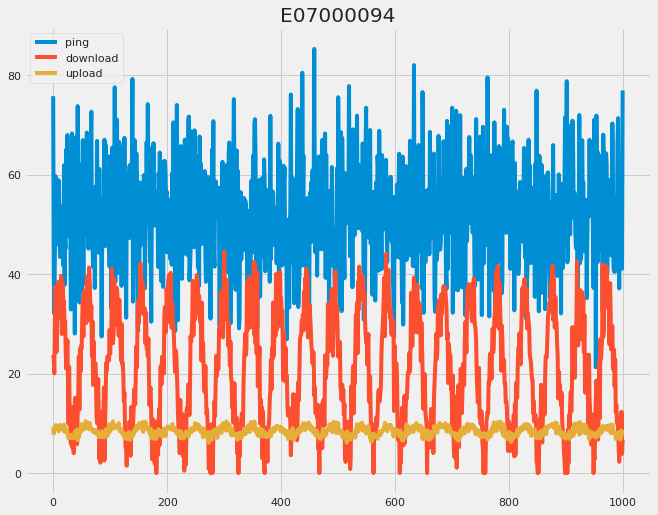

In [91]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
area = columns[0]
plt.figure(figsize=(10, 8))

for s in suffix.keys():
    query = ('SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime').format(area, s)
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)

In [92]:
import pandas as pd
new_columns = ['Area', 'Average_p', 'Average_d', 'Average_u']
df = pd.DataFrame(columns = new_columns)

In [93]:
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        query = ('SELECT avg("{}{}") FROM LA_wifi_speed_UK').format(columns[i], s)
        cur.execute(query)
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
df.head()

,Area,Average_p,Average_d,Average_u
0,E07000094,52.236409,21.220158,8.432513
1,E06000037,53.245935,21.674183,8.578965
2,E07000137,52.836715,21.441475,8.504868
3,E07000039,51.945697,21.047748,8.349793
4,E07000202,52.818290,21.314812,8.476300


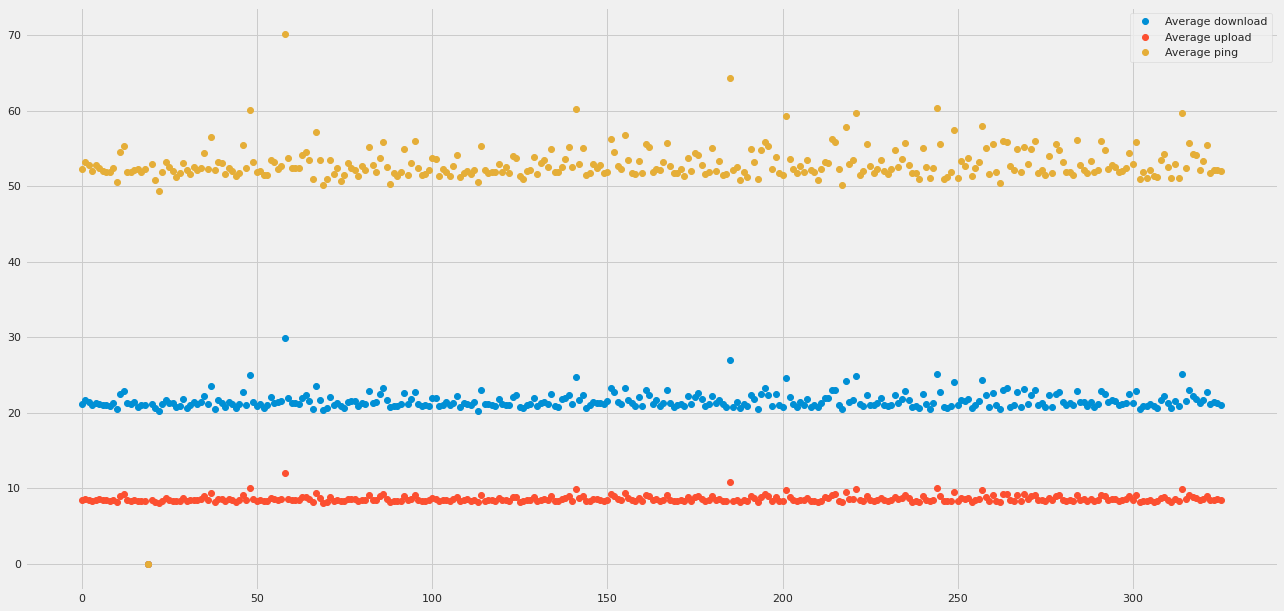

In [94]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df[['Average_d', 'Average_u', 'Average_p']], 'o')
plt.legend(['Average download', 'Average upload', 'Average ping'])

In [95]:
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

df.to_sql('average_speed', conn)

In [96]:
query_2 = 'SELECT * from average_speed'
cur.execute(query_2)

print(cur.fetchone())
print(cur.fetchone())

(0, 'E07000094', 52.236408904251086, 21.220158212642453, 8.432513187192598)
(1, 'E06000037', 53.24593492228075, 21.67418309568216, 8.57896456238587)


In [97]:
conn.close()

In [98]:
!csvsql --db sqlite:///InternetSpeed.db --insert LA_population.csv

In [99]:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [100]:
query = ('SELECT * from LA_population LIMIT 10')
cur.execute(query)
for row in cur:
    print(row)

('Aberdeen City', 'S12000033', 222793.0)
('Aberdeenshire', 'S12000034', 252973.0)
('Adur', 'E07000223', 61182.0)
('Allerdale', 'E07000026', 96422.0)
('Amber Valley', 'E07000032', 122309.0)
('Angus', 'S12000041', 115978.0)
('Antrim and Newtownabbey', 'N09000001', 138567.0)
('Ards and North Down', 'N09000011', 156672.0)
('Argyll and Bute', 'S12000035', 88166.0)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693.0)


In [101]:
query = ('SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area')
cur.execute(query)
k = 0
for row in cur:
    if k > 10:
        break
    print(row)
    k += 1

(0, 'E07000094', 52.236408904251086, 21.220158212642453, 8.432513187192598, 'Winchester', 'E07000094', 116595.0)
(1, 'E06000037', 53.24593492228075, 21.67418309568216, 8.57896456238587, 'West Berkshire', 'E06000037', 153822.0)
(2, 'E07000137', 52.83671498618508, 21.441474740703566, 8.504868143838769, 'East Lindsey', 'E07000137', 136401.0)
(3, 'E07000039', 51.94569738304245, 21.047748159370286, 8.3497925050985, 'South Derbyshire', 'E07000039', 94611.0)
(4, 'E07000202', 52.818289625070584, 21.31481162947925, 8.47630007709408, 'Ipswich', 'E07000202', 133384.0)
(5, 'E06000009', 52.40494473374317, 21.11712281722579, 8.544395527024687, 'Blackpool', 'E06000009', 142065.0)
(6, 'E07000041', 52.04954948767484, 20.95747538967456, 8.431877392984712, 'Exeter', 'E07000041', 117773.0)
(7, 'E07000127', 51.91827039969214, 20.958872910120352, 8.392851332046819, 'West Lancashire', 'E07000127', 110685.0)
(8, 'E07000107', 51.82708514060366, 20.880150698837603, 8.352989591262066, 'Dartford', 'E07000107', 97

In [102]:
import seaborn as sns
df = pd.read_sql(query, con=conn)
df.head()

,index,Area,Average_p,Average_d,Average_u,LA,LA_code,Total_Population
0,0,E07000094,52.236409,21.220158,8.432513,Winchester,E07000094,116595.0
1,1,E06000037,53.245935,21.674183,8.578965,West Berkshire,E06000037,153822.0
2,2,E07000137,52.836715,21.441475,8.504868,East Lindsey,E07000137,136401.0
3,3,E07000039,51.945697,21.047748,8.349793,South Derbyshire,E07000039,94611.0
4,4,E07000202,52.818290,21.314812,8.476300,Ipswich,E07000202,133384.0


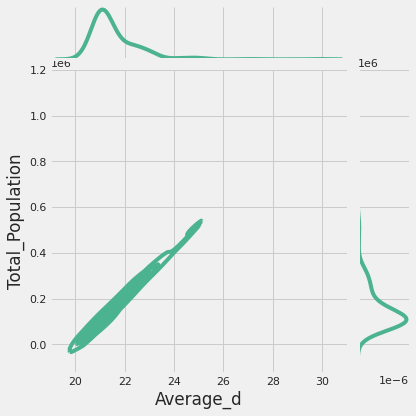

In [103]:
sns.jointplot(data=df, x="Average_d", y="Total_Population", kind="kde", color="#4CB391")
